<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

### Regression and Classification with the Ames Housing Data

---

You have just joined a new "full stack" real estate company in Ames, Iowa. The strategy of the firm is two-fold:
- Own the entire process from the purchase of the land all the way to sale of the house, and anything in between.
- Use statistical analysis to optimize investment and maximize return.

The company is still small, and though investment is substantial the short-term goals of the company are more oriented towards purchasing existing houses and flipping them as opposed to constructing entirely new houses. That being said, the company has access to a large construction workforce operating at rock-bottom prices.

This project uses the [Ames housing data recently made available on kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

In [85]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Estimating the value of homes from fixed characteristics.

---

Your superiors have outlined this year's strategy for the company:
1. Develop an algorithm to reliably estimate the value of residential houses based on *fixed* characteristics.
2. Identify characteristics of houses that the company can cost-effectively change/renovate with their construction team.
3. Evaluate the mean dollar value of different renovations.

Then we can use that to buy houses that are likely to sell for more than the cost of the purchase plus renovations.

Your first job is to tackle #1. You have a dataset of housing sale data with a huge amount of features identifying different aspects of the house. The full description of the data features can be found in a separate file:

    housing.csv
    data_description.txt
    
You need to build a reliable estimator for the price of the house given characteristics of the house that cannot be renovated. Some examples include:
- The neighborhood
- Square feet
- Bedrooms, bathrooms
- Basement and garage space

and many more. 

Some examples of things that **ARE renovate-able:**
- Roof and exterior features
- "Quality" metrics, such as kitchen quality
- "Condition" metrics, such as condition of garage
- Heating and electrical components

and generally anything you deem can be modified without having to undergo major construction on the house.

---

**Your goals:**
1. Perform any cleaning, feature engineering, and EDA you deem necessary.
- Be sure to remove any houses that are not residential from the dataset.
- Identify **fixed** features that can predict price.
- Train a model on pre-2010 data and evaluate its performance on the 2010 houses.
- Characterize your model. How well does it perform? What are the best estimates of price?

> **Note:** The EDA and feature engineering component to this project is not trivial! Be sure to always think critically and creatively. Justify your actions! Use the data description file!

In [86]:
# Load the data
housing = pd.read_csv('./housing.csv')

In [87]:
# View the first 5 rows and some column names
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [88]:
# View all column names
housing.columns

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish',

In [89]:
# How many rows and columns total
housing.shape

(1460, 81)

In [90]:
# Random sample of data entries to look for potential problems
housing.sample(7)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
961,962,60,RL,NaN,12227,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,272000
746,747,60,RL,NaN,8795,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,236000
1017,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml,187500
687,688,160,FV,NaN,5105,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,148800
27,28,20,RL,98.0,11478,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,306000
1219,1220,160,RM,21.0,1680,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,91500
514,515,45,RL,55.0,10594,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,96500


In [91]:
# What are the column data types
housing.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [92]:
# Get descriptive statistics (central tendency, dispersion and shape of dataset’s distribution) without NaN values
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [93]:
# How many null values per column (out of 1460)
housing.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [94]:
# Another look at how many values are not null per column (out of 1460)
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [95]:
# How many columns have 1300 or more null values
housing.isnull().sum().values >= 1300

array([False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,  True, False, False, False, False, False, False], dtype=bool)

In [96]:
# Since PoolQC, MiscFeature & Alley had more than 1300 null values, I chose to drop them from the dataset
housing.drop(['PoolQC', 'MiscFeature', 'Alley'], axis = 1, inplace = True)

In [97]:
### Code has not been run ###
# Undecided on whether I will drop the total null values
# housing.dropna(inplace = True)

In [98]:
# Verify the 3 columns have been removed
housing.columns

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'LotShape', u'LandContour', u'Utilities', u'LotConfig',
       u'LandSlope', u'Neighborhood', u'Condition1', u'Condition2',
       u'BldgType', u'HouseStyle', u'OverallQual', u'OverallCond',
       u'YearBuilt', u'YearRemodAdd', u'RoofStyle', u'RoofMatl',
       u'Exterior1st', u'Exterior2nd', u'MasVnrType', u'MasVnrArea',
       u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual', u'BsmtCond',
       u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1', u'BsmtFinType2',
       u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF', u'Heating', u'HeatingQC',
       u'CentralAir', u'Electrical', u'1stFlrSF', u'2ndFlrSF', u'LowQualFinSF',
       u'GrLivArea', u'BsmtFullBath', u'BsmtHalfBath', u'FullBath',
       u'HalfBath', u'BedroomAbvGr', u'KitchenAbvGr', u'KitchenQual',
       u'TotRmsAbvGrd', u'Functional', u'Fireplaces', u'FireplaceQu',
       u'GarageType', u'GarageYrBlt', u'GarageFinish', u'GarageCars',
 

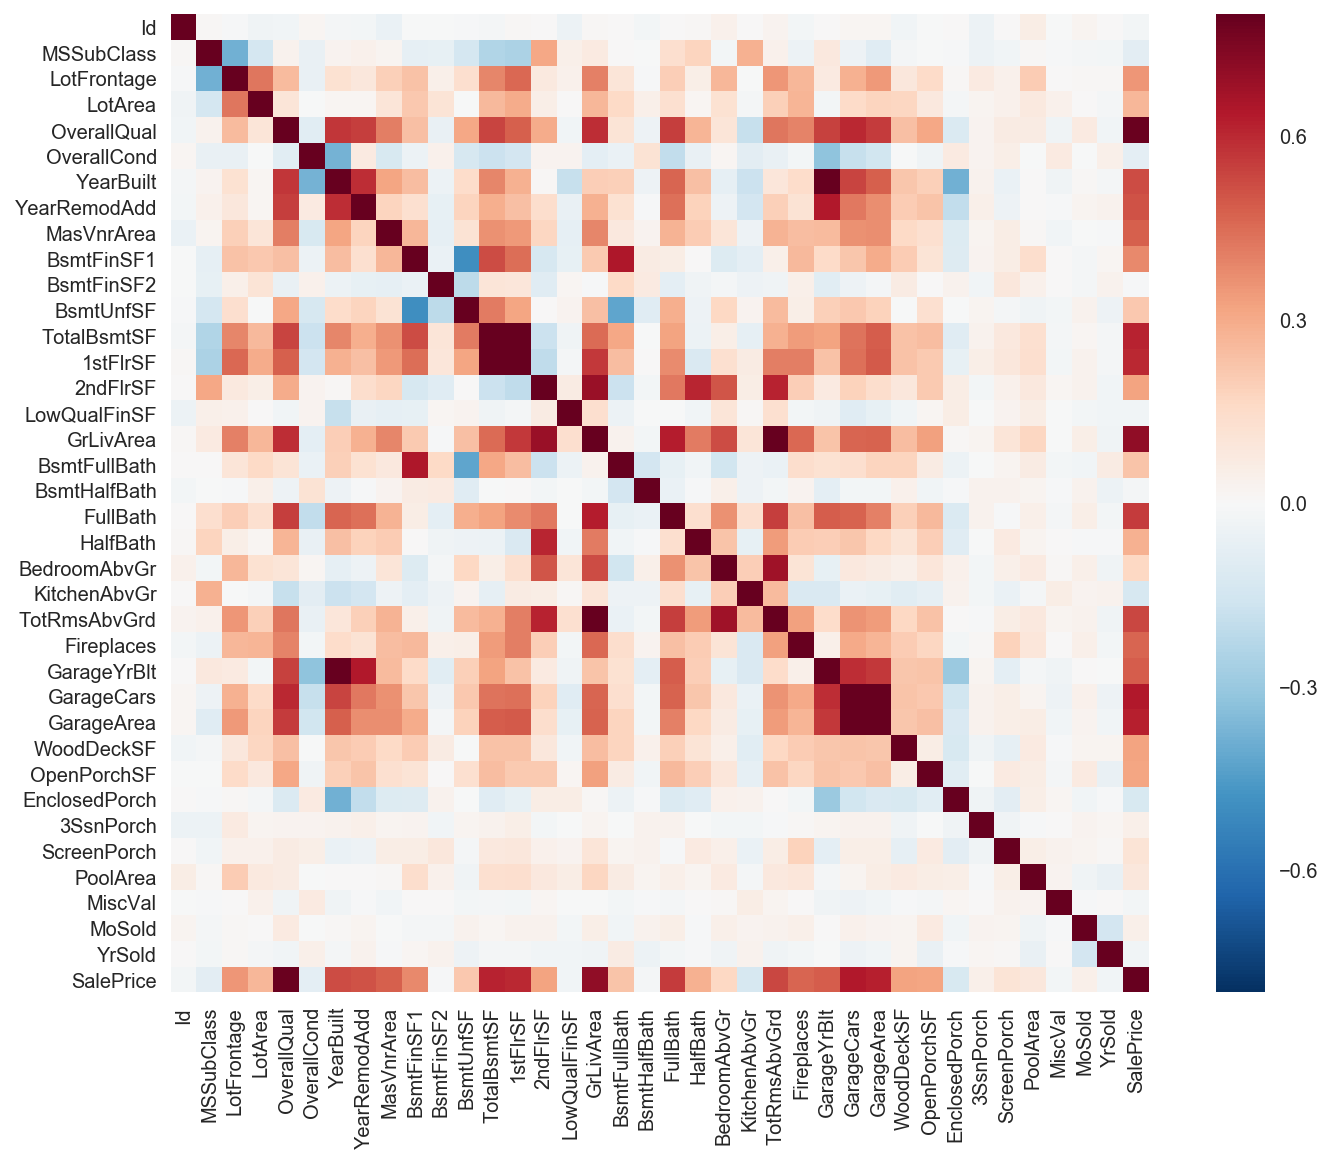

In [99]:
# Create a heatmap to get an idea of which variables are most closely related
corr = housing.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=.8, square=True);

In [100]:
# Since heatmap was not as clear as intended yet, use a correlation matrix to see if there is any more clarity
housing.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [101]:
# Are there any non-residentially zoned properties
housing['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [102]:
# Only keep the homes that are residentially zoned
housing_residential = housing[housing['MSZoning'] != 'C (all)']

In [103]:
# Verify the 10 'C' values are removed from the 1460 rows
housing_residential.shape

(1450, 78)

In [104]:
# Identify the fixed characteristics of a property and save in new DataFrame
housing_fixed = housing[['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 
                 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 
                 'Foundation', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 
                 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 
                 'TotRmsAbvGrd', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageCars', 'GarageArea', 
                 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MoSold', 
                 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice']]

In [105]:
#View new DataFrame
housing_fixed

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,Inside,Gtl,...,61,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,Inside,Gtl,...,42,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,Corner,Gtl,...,35,272,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,FR2,Gtl,...,84,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,IR1,Lvl,Inside,Gtl,...,30,0,320,0,0,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,Reg,Lvl,Inside,Gtl,...,57,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,IR1,Lvl,Corner,Gtl,...,204,228,0,0,0,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,Reg,Lvl,Inside,Gtl,...,0,205,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,Reg,Lvl,Corner,Gtl,...,4,0,0,0,0,1,2008,WD,Normal,118000


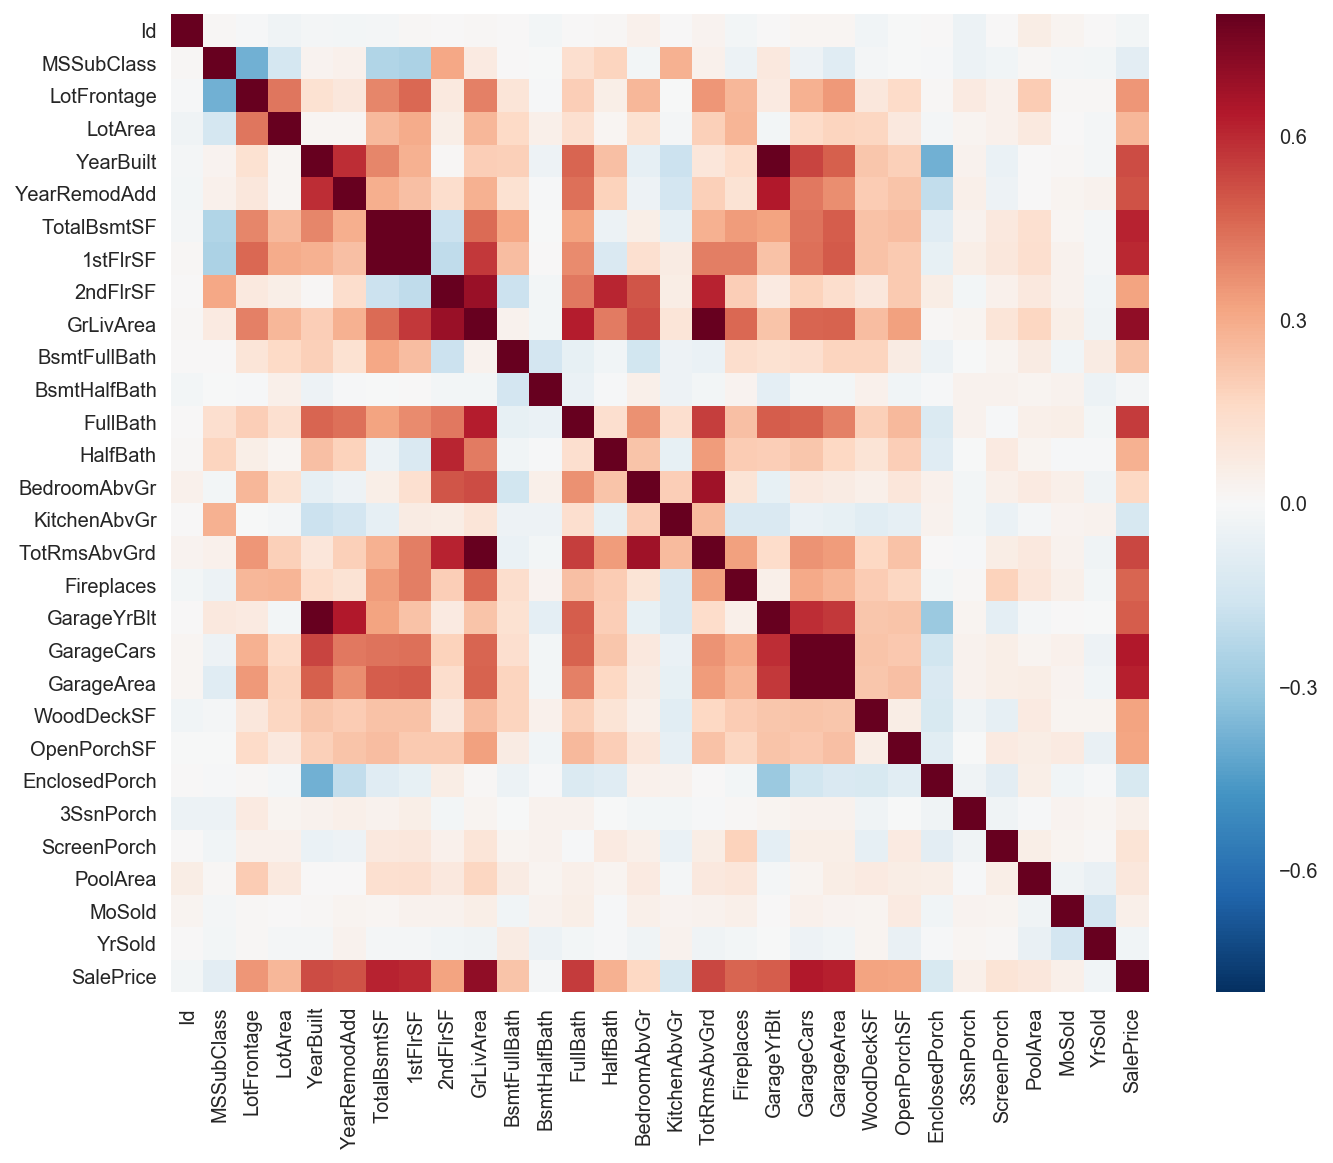

In [106]:
# Heatmap with smaller variable set: housing_fixed
housing_fixed_corr = housing_fixed.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(housing_fixed_corr, vmax=.8, square=True);

In [107]:
# Identify the changeable characteristics of a property and save in new DataFrame
housing_change = housing[['Utilities', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 
                  'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                  'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 
                  'LowQualFinSF', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 
                  'PavedDrive', 'Fence', 'MiscVal']]

In [108]:
# View new DataFrame
housing_change

,Utilities,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,...,LowQualFinSF,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,MiscVal
0,AllPub,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,...,0,Gd,Typ,NaN,RFn,TA,TA,Y,NaN,0
1,AllPub,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,...,0,TA,Typ,TA,RFn,TA,TA,Y,NaN,0
2,AllPub,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,...,0,Gd,Typ,TA,RFn,TA,TA,Y,NaN,0
3,AllPub,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,...,0,Gd,Typ,Gd,Unf,TA,TA,Y,NaN,0
4,AllPub,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,...,0,Gd,Typ,TA,RFn,TA,TA,Y,NaN,0
5,AllPub,5,5,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,...,0,TA,Typ,NaN,Unf,TA,TA,Y,MnPrv,700
6,AllPub,8,5,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,...,0,Gd,Typ,Gd,RFn,TA,TA,Y,NaN,0
7,AllPub,7,6,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,...,0,TA,Typ,TA,RFn,TA,TA,Y,NaN,350
8,AllPub,7,5,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,...,0,TA,Min1,TA,Unf,Fa,TA,Y,NaN,0
9,AllPub,5,6,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,...,0,TA,Typ,TA,RFn,Gd,TA,Y,NaN,0


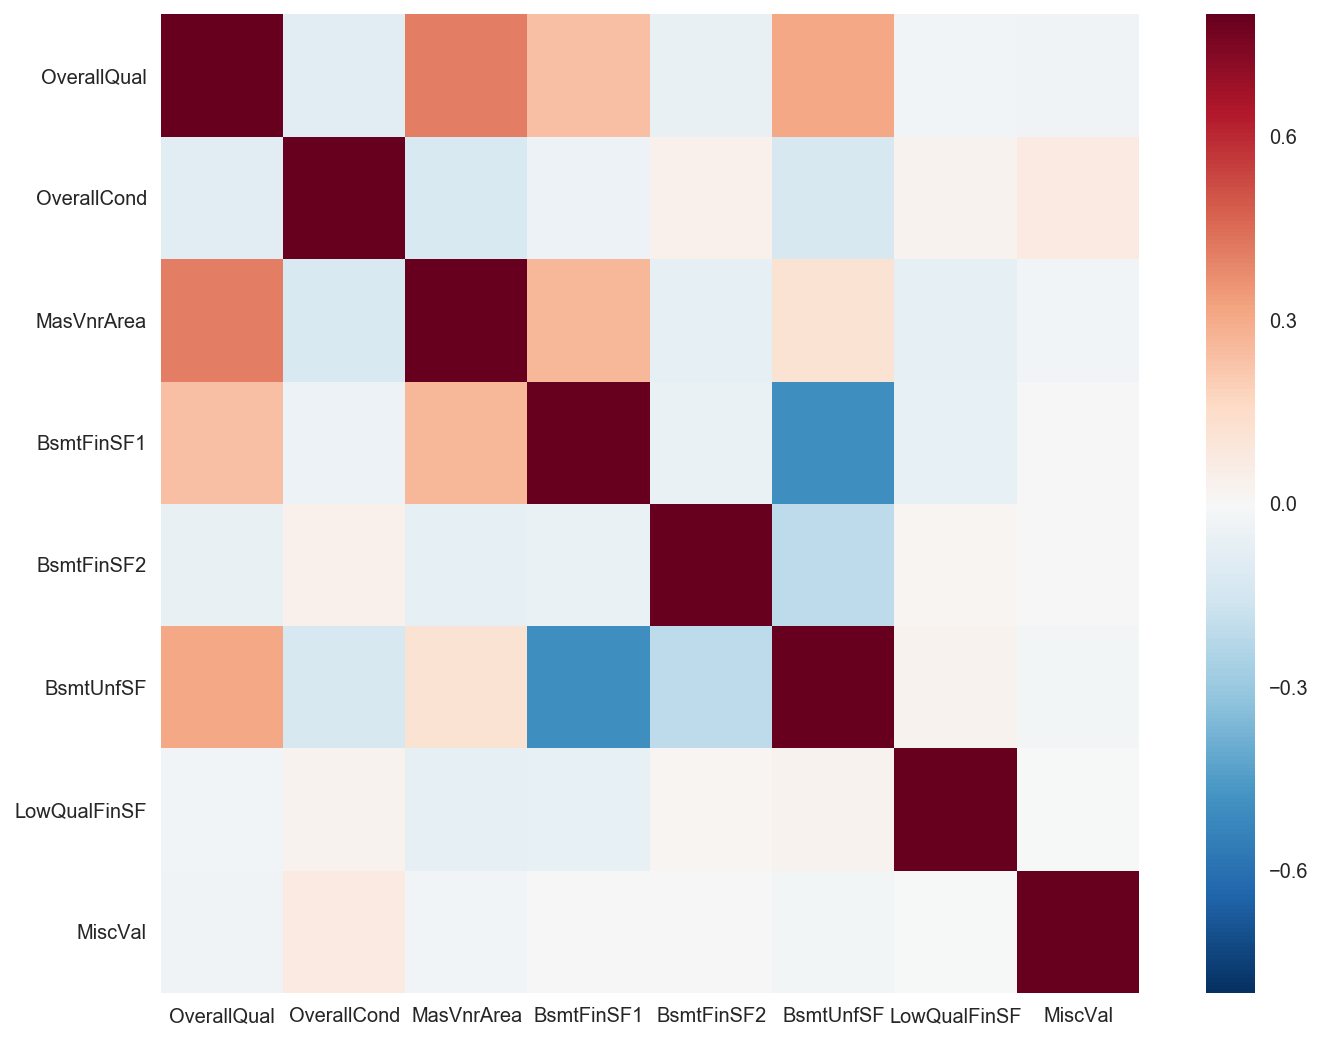

In [109]:
# Heatmap with smaller variable set: housing_change
housing_change_corr = housing_change.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(housing_change_corr, vmax = .8, square = True)

In [ ]:
# After viewing the heatmaps of the DataFrames with the smaller sets of variables, those DataFrames will need to be
# adjusted further to be more succinct (especially the housing_fixed DataFrame)

In [110]:
housing_fixed_abr = housing[['Neighborhood', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'HalfBath', 'GarageArea']]
housing_fixed_abr

,Neighborhood,TotalBsmtSF,1stFlrSF,2ndFlrSF,HalfBath,GarageArea
0,CollgCr,856,856,854,1,548
1,Veenker,1262,1262,0,0,460
2,CollgCr,920,920,866,1,608
3,Crawfor,756,961,756,0,642
4,NoRidge,1145,1145,1053,1,836
5,Mitchel,796,796,566,1,480
6,Somerst,1686,1694,0,0,636
7,NWAmes,1107,1107,983,1,484
8,OldTown,952,1022,752,0,468
9,BrkSide,991,1077,0,0,205


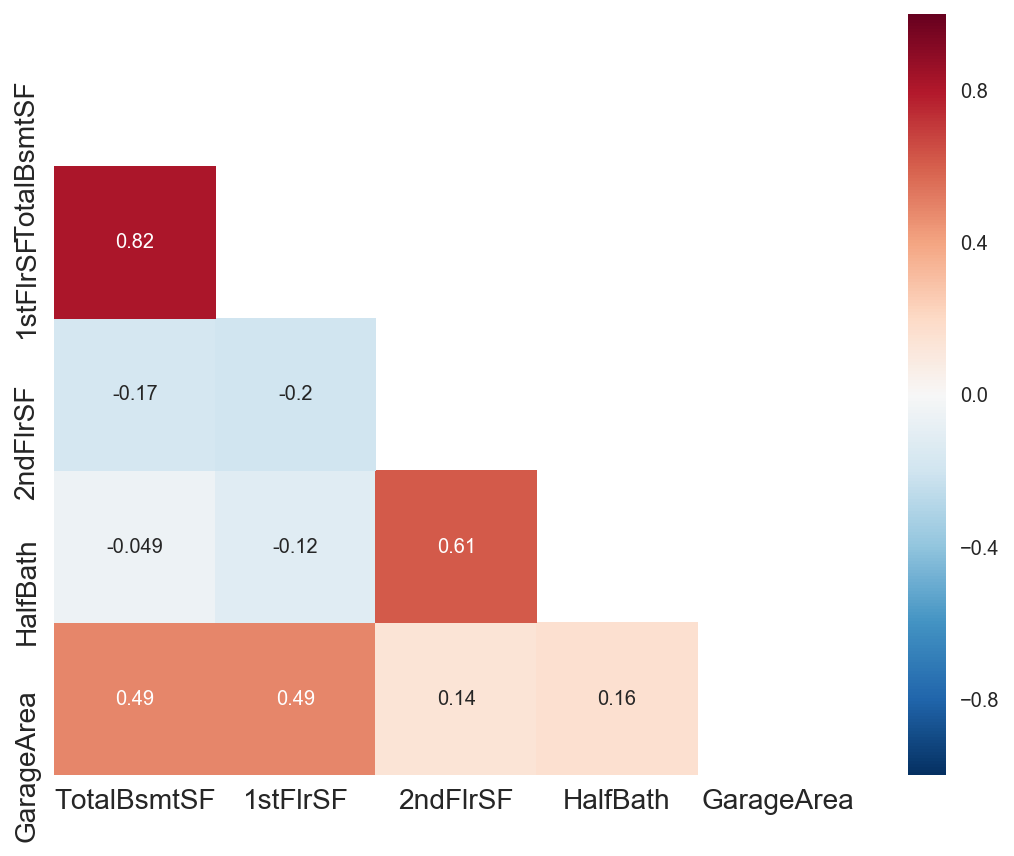

In [111]:
housing_fixed_abr_corr = housing_fixed_abr.corr()
fix, ax = plt.subplots(figsize=(9,7))

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(housing_fixed_abr_corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(housing_fixed_abr_corr, mask = mask, ax = ax, annot = True)
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize = 14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize = 14)
plt.show()

In [112]:
housing_change_abr = housing[['RoofStyle', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'BsmtQual','Heating',
                              'KitchenQual', 'GarageQual']]
housing_change_abr

,RoofStyle,Exterior1st,Exterior2nd,ExterQual,BsmtQual,Heating,KitchenQual,GarageQual
0,Gable,VinylSd,VinylSd,Gd,Gd,GasA,Gd,TA
1,Gable,MetalSd,MetalSd,TA,Gd,GasA,TA,TA
2,Gable,VinylSd,VinylSd,Gd,Gd,GasA,Gd,TA
3,Gable,Wd Sdng,Wd Shng,TA,TA,GasA,Gd,TA
4,Gable,VinylSd,VinylSd,Gd,Gd,GasA,Gd,TA
5,Gable,VinylSd,VinylSd,TA,Gd,GasA,TA,TA
6,Gable,VinylSd,VinylSd,Gd,Ex,GasA,Gd,TA
7,Gable,HdBoard,HdBoard,TA,Gd,GasA,TA,TA
8,Gable,BrkFace,Wd Shng,TA,TA,GasA,TA,Fa
9,Gable,MetalSd,MetalSd,TA,TA,GasA,TA,Gd


In [ ]:
# Because housing_change_abr has no features with numeric values, the heatmap will not display below

# housing_change_abr_corr = housing_change_abr.corr()
# fix, ax = plt.subplots(figsize=(9,7))

# # Generate a mask for the upper triangle (taken from seaborn example gallery)
# mask = np.zeros_like(housing_change_abr_corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True
# ax = sns.heatmap(housing_change_abr_corr, mask=mask, ax=ax, annot=True)
# ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
# ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)
# plt.show()

In [ ]:
# Train a model on data from before 2010 and evaluate it's performance. This will be done using multiple linear 
# regression, since there will be one target variable and more than one predictor/feature

In [113]:
import statsmodels.api as sm
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import StandardScaler

In [114]:
# Pull all homes sold before 2010 to create new DataFrame. This will also serve as my training data
housing_2009 = housing[housing['YrSold'] < 2010]
housing_2009

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,...,320,0,0,MnPrv,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,NaN,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,NaN,0,1,2008,WD,Normal,118000


In [115]:
# Identify all the homes sold in 2010. This will also serve as the test data
housing_2010 = housing[housing['YrSold'] == 2010]
housing_2010

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
16,17,20,RL,NaN,11241,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,0,NaN,700,3,2010,WD,Normal,149000
24,25,20,RL,NaN,8246,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,MnPrv,0,5,2010,WD,Normal,154000
26,27,20,RL,60.0,7200,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,NaN,0,5,2010,WD,Normal,134800
27,28,20,RL,98.0,11478,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,0,5,2010,WD,Normal,306000
33,34,20,RL,70.0,10552,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,NaN,0,4,2010,WD,Normal,165500
38,39,20,RL,68.0,7922,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,0,1,2010,WD,Abnorml,109000
45,46,120,RL,61.0,7658,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,0,2,2010,WD,Normal,319900
52,53,90,RM,110.0,8472,Grvl,IR2,Bnk,AllPub,Corner,...,0,0,0,NaN,0,5,2010,WD,Normal,110000
63,64,70,RM,50.0,10300,Pave,IR1,Bnk,AllPub,Inside,...,0,0,0,GdPrv,0,4,2010,WD,Normal,140000
66,67,20,RL,NaN,19900,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,0,7,2010,WD,Normal,180000


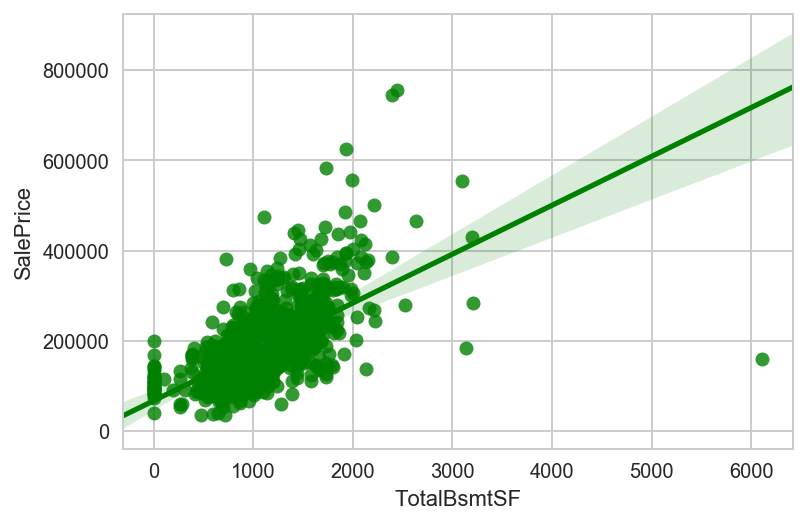

In [116]:
sns.regplot('TotalBsmtSF', 'SalePrice', housing_2009, color="g")

In [117]:
# Decided to make an abridged version of the categories used for 2009 data
# Need dummy variables to convert categorical columns to numerical fields -> The abridged variable with dummies will
# be the new training set
housing_2009_abr_dummies = pd.get_dummies(housing_2009, columns = housing_2009[['Neighborhood', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
                                                               'HalfBath', 'GarageArea', 'RoofStyle', 'Exterior1st', 
                                                               'Exterior2nd', 'ExterQual', 'BsmtQual','Heating', 
                                                               'KitchenQual', 'GarageQual']])
housing_2009_abr_dummies

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,Heating_Wall,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,1,0,0,0,0,0,1
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,1,0,0,0,0,1
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,1,0,0,0,0,0,1
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,1,0,0,0,0,0,1
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,1,0,0,0,0,0,1
5,6,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,1,0,0,0,0,1
6,7,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,1,0,0,0,0,0,1
7,8,60,RL,NaN,10382,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,1,0,0,0,0,1
8,9,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,1,0,1,0,0,0
9,10,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,1,0,0,1,0,0


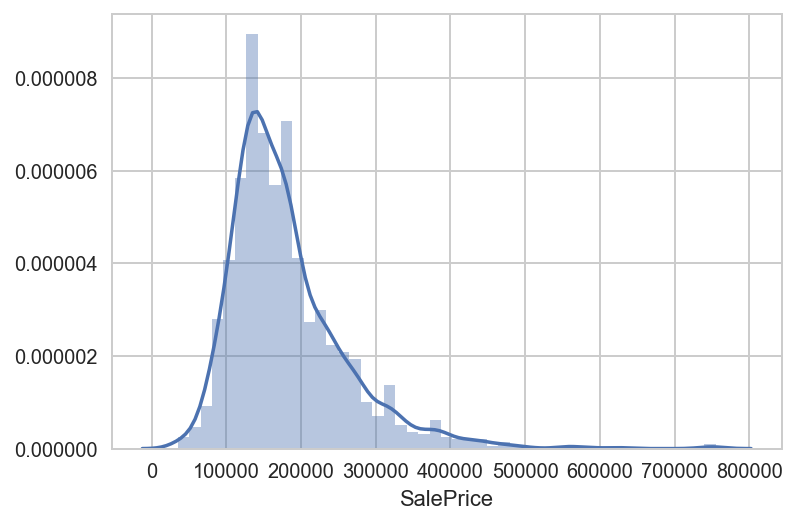

In [118]:
sns.distplot(housing_2009['SalePrice'])

In [ ]:
# The distribution of the Sales Prices for the homes sold in or before 2009 are slightly skewed

In [120]:
# Getting target variable
y = housing['SalePrice']

y_train = y.ix[housing.YrSold < 2010]
y_test = y.ix[housing.YrSold == 2010]

# Standardizing X variable
from sklearn.preprocessing import StandardScaler

X = housing_fixed_abr

X_train = X.ix[housing.YrSold < 2010].drop('Neighborhood', axis = 1)
X_test = X.ix[housing.YrSold == 2010].drop('Neighborhood', axis = 1)

ss = StandardScaler()
Xs_train = ss.fit_transform(X_train)
Xs_test = ss.transform(X_test)

In [121]:
# Linear Regression Model
linreg = LinearRegression()
linreg.fit(Xs_train, y_train)

scores = np.mean(cross_val_score(linreg, Xs_test, y_test, cv = 5))
print scores

0.696859367904


In [122]:
# Lasso Regression Model
LCV = LassoCV(n_alphas = 100, cv = 10)

LCV.fit(Xs_train, y_train)

LCV_coefficients = LCV.coef_
LCV_score = LCV.score(Xs_test, y_test)
LCV_alpha = LCV.alpha_

print LCV_score
print LCV_alpha

0.723754852337
753.939738863


In [ ]:
# The LassoCV model's score is higher than the Linear Regression model's score

In [123]:
LCV_df = pd.DataFrame([LCV_coefficients, housing_fixed_abr], index = ['Coeffs', 'Variable']).T     #Transpose index & columns

LCV_df = LCV_df[LCV_df['Coeffs'] !=0]
LCV_df['abs_coeffs'] = LCV_df['Coeffs']
LCV_df = LCV_df.sort_values('abs_coeffs', ascending = False)

best_preds = LCV_df['Variable'].values

# The best predictors are:
print best_preds

['1stFlrSF' 'TotalBsmtSF' 'HalfBath' 'Neighborhood' '2ndFlrSF' 'GarageArea']


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Determine any value of *changeable* property characteristics unexplained by the *fixed* ones.

---

Now that you have a model that estimates the price of a house based on its static characteristics, we can move forward with part 2 and 3 of the plan: what are the costs/benefits of quality, condition, and renovations?

There are two specific requirements for these estimates:
1. The estimates of effects must be in terms of dollars added or subtracted from the house value. 
2. The effects must be on the variance in price remaining from the first model.

The residuals from the first model (training and testing) represent the variance in price unexplained by the fixed characteristics. Of that variance in price remaining, how much of it can be explained by the easy-to-change aspects of the property?

---

**Your goals:**
1. Evaluate the effect in dollars of the renovate-able features. 
- How would your company use this second model and its coefficients to determine whether they should buy a property or not? Explain how the company can use the two models you have built to determine if they can make money. 
- Investigate how much of the variance in price remaining is explained by these features.
- Do you trust your model? Should it be used to evaluate which properties to buy and fix up?

In [ ]:
sns.pairplot(housing_change)

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. What property characteristics predict an "abnormal" sale?

---

The `SaleCondition` feature indicates the circumstances of the house sale. From the data file, we can see that the possibilities are:

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)
       
One of the executives at your company has an "in" with higher-ups at the major regional bank. His friends at the bank have made him a proposal: if he can reliably indicate what features, if any, predict "abnormal" sales (foreclosures, short sales, etc.), then in return the bank will give him first dibs on the pre-auction purchase of those properties (at a dirt-cheap price).

He has tasked you with determining (and adequately validating) which features of a property predict this type of sale. 

---

**Your task:**
1. Determine which features predict the `Abnorml` category in the `SaleCondition` feature.
- Justify your results.

This is a challenging task that tests your ability to perform classification analysis in the face of severe class imbalance. You may find that simply running a classifier on the full dataset to predict the category ends up useless: when there is bad class imbalance classifiers often tend to simply guess the majority class.

It is up to you to determine how you will tackle this problem. I recommend doing some research to find out how others have dealt with the problem in the past. Make sure to justify your solution. Don't worry about it being "the best" solution, but be rigorous.

Be sure to indicate which features are predictive (if any) and whether they are positive or negative predictors of abnormal sales.

In [ ]:
# A:

# Presentation Link

http://prezi.com/kwif-o90-dnt/?utm_campaign=share&utm_medium=copy